In [ ]:
import matplotlib
#matplotlib.use('GtkAgg')
import matplotlib.pyplot as plt
plt.clf()
plt.cla()
plt.close()
import matplotlib
plt.plot([1,2,3,4])
plt.ylabel('some numbers')  
#plt.show()

In [3]:
import matplotlib
matplotlib.matplotlib_fname()

u'/Users/meicg/.matplotlib/matplotlibrc'

In [2]:

import numpy as np
import matplotlib.pyplot as plt
plt.clf()
plt.cla()
plt.close()

x = np.linspace(0, 10, 1000)
y = np.sin(x)
z = np.cos(x**2)

plt.figure(figsize=(8,4))
plt.plot(x,y,label="$sin(x)$",color="red",linewidth=2)
plt.plot(x,z,"b--",label="$cos(x^2)$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("PyPlot First Example")
plt.ylim(-1.2,1.2)
plt.legend()
plt.show()
plt.savefig('temp.png')

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 10, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()
plt.savefig('temp.png')
print x

[  81.59298985   91.55771139   84.36664311 ...,  108.40772831   86.25084645
   87.13634325]


In [1]:
from numpy import * 
from sklearn.datasets import load_iris     # import datasets

# load the dataset: iris
iris = load_iris() 
samples = iris.data
#print samples 
target = iris.target 
#print target
#print samples
# import the LogisticRegression
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression()  # 使用类，参数全是默认的
classifier.fit(samples, target)  # 训练数据来学习，不需要返回值

x = classifier.predict([5, 3, 5, 2.5])  # 测试数据，分类返回标记

#print x 

#其实导入的是sklearn.linear_model的一个类：LogisticRegression， 它里面有许多方法
#常用的方法是fit（训练分类模型）、predict（预测测试样本的标记）

#不过里面没有返回LR模型中学习到的权重向量w，感觉这是一个缺陷

In [2]:
# Creating the dataset
# e.g. make_moons generates crescent-shaped data
# Check out make_classification, which generates linearly-separable data
from sklearn.datasets import make_moons
 
X, y = make_moons(
    n_samples=500,  # the number of observations
    random_state=1,
    noise=0.3
)
 
# Take a peek
print(X[:10,])
print(y[:10])

[[ 0.50316464  0.11135559]
 [ 1.06597837 -0.63035547]
 [ 0.95663377  0.58199637]
 [ 0.33961202  0.40713937]
 [ 2.17952333 -0.08488181]
 [ 2.00520942  0.7817976 ]
 [ 0.12531776 -0.14925731]
 [ 1.06990641  0.36447753]
 [-0.76391099 -0.6136396 ]
 [ 0.55678871  0.8810501 ]]
[1 1 0 0 1 1 1 0 0 0]


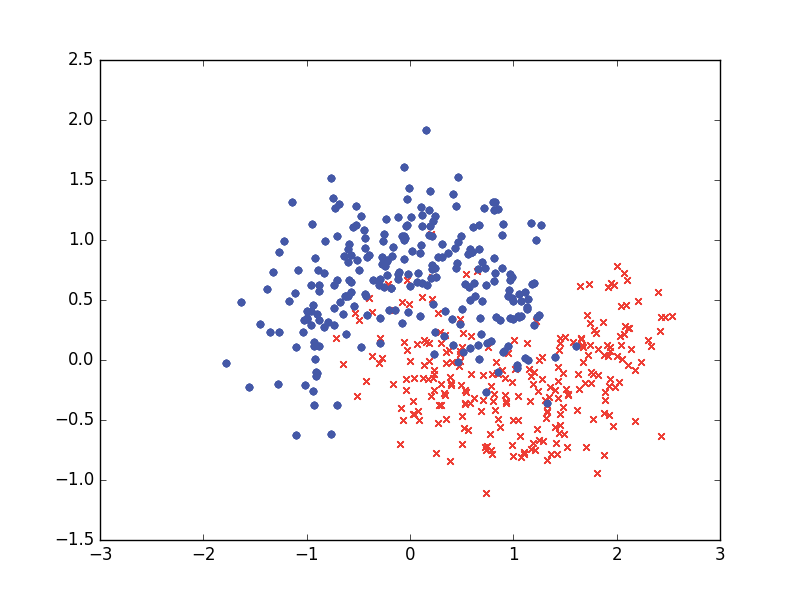

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
 
# %matplotlib inline  # for the plots to appear inline in jupyter notebooks
 
# Plot the first feature against the other, color by class
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="#EE3D34", marker="x")
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="#4458A7", marker="o")
plt.savefig('temp.png')
from IPython.display import Image
Image(filename = 'temp.png')

In [16]:
from sklearn.cross_validation import train_test_split
 
# Split into training and test sets
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=0.5)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
 
knn99 = KNeighborsClassifier(n_neighbors = 99)
knn99.fit(XTrain, yTrain)
yPredK99 = knn99.predict(XTest)
print "Overall Error of k=99 Model:", 1 - round(metrics.accuracy_score(yTest, yPredK99), 2)
 
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1.fit(XTrain, yTrain)
yPredK1 = knn1.predict(XTest)
print "Overall Error of k=1 Model:", 1 - round(metrics.accuracy_score(yTest, yPredK1), 2)

Overall Error of k=99 Model: 0.15
Overall Error of k=1 Model: 0.15


In [19]:
knn50 = KNeighborsClassifier(n_neighbors = 50)
knn50.fit(XTrain, yTrain)
yPredK50 = knn50.predict(XTest)
print "Overall Error of k=50 Model:", 1 - round(metrics.accuracy_score(yTest, yPredK50), 2)

Overall Error of k=50 Model: 0.11


In [20]:
import numpy as np
from sklearn.cross_validation import train_test_split, cross_val_score
 
knn = KNeighborsClassifier()
 
# the range of number of neighbors you want to test
n_neighbors = np.arange(1, 141, 2)
 
# here you store the models for each dataset used
train_scores = list()
test_scores = list()
cv_scores = list()
 
# loop through possible n_neighbors and try them out
for n in n_neighbors:
    knn.n_neighbors = n
    knn.fit(XTrain, yTrain)
    train_scores.append(1 - metrics.accuracy_score(yTrain, knn.predict(XTrain)))  # this will over-estimate the accuracy
    test_scores.append(1 - metrics.accuracy_score(yTest, knn.predict(XTest)))
    cv_scores.append(1 - cross_val_score(knn, XTrain, yTrain, cv = 10).mean())  # you take the mean of the CV scores

In [21]:
# what do these different datasets think is the best value of k?
print(
    'The best values of k are:\n' \
    '{} according to the Training Set\n' \
    '{} according to the Test Set and\n' \
    '{} according to Cross-Validation'.format(
        min(n_neighbors[train_scores == min(train_scores)]),
        min(n_neighbors[test_scores == min(test_scores)]),
        min(n_neighbors[cv_scores == min(cv_scores)])        
    )
)    

The best values of k are:
1 according to the Training Set
23 according to the Test Set and
11 according to Cross-Validation
